# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as math
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFECV

## Step 1: Read in Data

In [2]:
df = pd.read_csv("kc_house_data_train.csv", index_col=0)
print(df.shape)
df.head()

(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

_I chose to drop lat and long because it was too specific for what we needed_

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.drop(columns=['lat', 'long'], inplace=True)

_I looked at the value counts of some features I thought was important_

In [5]:
## years renovated distribution

df.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [6]:
## What is the distribution of bathroom count
df.bathrooms.value_counts().sort_index()

0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [7]:
df.groupby('bathrooms')['price'].mean()

## Weird thing - 1.25 bathrooms costs 200K more than 1.5 baths to 2.5 baths. 

bathrooms
0.00    5.077062e+05
0.50    2.255000e+05
0.75    2.766520e+05
1.00    3.463276e+05
1.25    6.010000e+05
1.50    4.073672e+05
1.75    4.582803e+05
2.00    4.557473e+05
2.25    5.372734e+05
2.50    5.566379e+05
2.75    6.545027e+05
3.00    7.149029e+05
3.25    9.656770e+05
3.50    9.289996e+05
3.75    1.198263e+06
4.00    1.309828e+06
4.25    1.532047e+06
4.50    1.328587e+06
4.75    1.817828e+06
5.00    1.749518e+06
5.25    1.866118e+06
5.50    2.803286e+06
5.75    3.143333e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.50    4.500000e+05
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [8]:
df.bedrooms.value_counts().sort_index()

0       12
1      160
2     2204
3     7864
4     5488
5     1283
6      229
7       30
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df.groupby('bedrooms')['price'].mean()

bedrooms
0     4.319667e+05
1     3.265255e+05
2     4.006608e+05
3     4.654743e+05
4     6.377381e+05
5     7.847411e+05
6     8.377285e+05
7     9.861672e+05
8     1.255600e+06
9     8.167998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [10]:
avg_price_zip = df.groupby('zipcode')['price'].mean()

In [11]:
avg_price_zip.describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

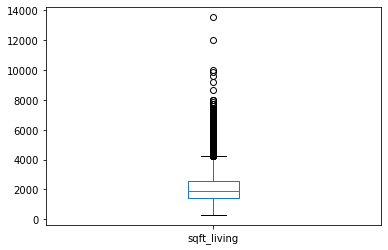

In [12]:
df.sqft_living.plot(kind='box');

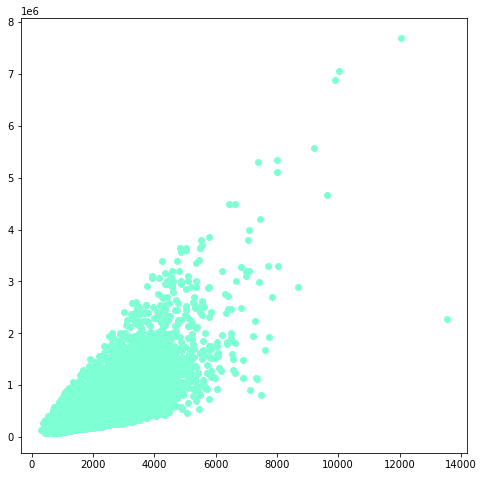

In [13]:
fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(df['sqft_living'], df['price'], color='aquamarine');

In [14]:
df.view.value_counts().sort_index()

0    15571
1      264
2      775
3      410
4      270
Name: view, dtype: int64

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

_Bedroom Cleaning_

In [15]:
df.bedrooms.value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
df.groupby('bedrooms')['price'].mean()

bedrooms
0     4.319667e+05
1     3.265255e+05
2     4.006608e+05
3     4.654743e+05
4     6.377381e+05
5     7.847411e+05
6     8.377285e+05
7     9.861672e+05
8     1.255600e+06
9     8.167998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [17]:
df.loc[df.bedrooms]['price'].mean()

1071793.059572007

In [18]:
df['price'] = np.where(df['bedrooms']>=8, df.loc[df.bedrooms]['price'].mean(), df['price'])

In [19]:
df['bedrooms'] = np.where(df['bedrooms']>=8, 8, df['bedrooms'])

In [20]:
df.groupby('bedrooms')['price'].mean()

bedrooms
0    4.319667e+05
1    3.265255e+05
2    4.006608e+05
3    4.654743e+05
4    6.377381e+05
5    7.847411e+05
6    8.377285e+05
7    9.861672e+05
8    1.071793e+06
Name: price, dtype: float64

_Bathroom Cleaning_

In [21]:
df.bathrooms.value_counts().sort_index()

0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [22]:
df.groupby(df.bathrooms)['price'].mean()

## 0 baths and 1.25 baths has higher means $$ than those with more bathrooms which seems weird. 

bathrooms
0.00    5.077062e+05
0.50    2.255000e+05
0.75    2.766520e+05
1.00    3.463276e+05
1.25    6.010000e+05
1.50    4.073672e+05
1.75    4.584579e+05
2.00    4.560196e+05
2.25    5.372734e+05
2.50    5.566379e+05
2.75    6.546742e+05
3.00    7.194109e+05
3.25    9.656770e+05
3.50    9.274798e+05
3.75    1.200217e+06
4.00    1.287542e+06
4.25    1.532047e+06
4.50    1.334795e+06
4.75    1.817828e+06
5.00    1.783741e+06
5.25    1.859190e+06
5.50    2.803286e+06
5.75    3.143333e+06
6.00    2.767132e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.50    1.071793e+06
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [23]:
df['price'] = np.where(df['bathrooms']==0, df.loc[df.bathrooms==0.5]['price'].mean(), df['price'])

In [24]:
df.groupby(df.bathrooms)['price'].mean()

## 0 baths and 1.25 baths has higher means $$ than those with more bathrooms which seems weird. 

bathrooms
0.00    2.255000e+05
0.50    2.255000e+05
0.75    2.766520e+05
1.00    3.463276e+05
1.25    6.010000e+05
1.50    4.073672e+05
1.75    4.584579e+05
2.00    4.560196e+05
2.25    5.372734e+05
2.50    5.566379e+05
2.75    6.546742e+05
3.00    7.194109e+05
3.25    9.656770e+05
3.50    9.274798e+05
3.75    1.200217e+06
4.00    1.287542e+06
4.25    1.532047e+06
4.50    1.334795e+06
4.75    1.817828e+06
5.00    1.783741e+06
5.25    1.859190e+06
5.50    2.803286e+06
5.75    3.143333e+06
6.00    2.767132e+06
6.25    3.094000e+06
6.50    2.238890e+06
6.75    2.734000e+06
7.50    1.071793e+06
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

### Dummy Data for Zip Code

In [25]:
zip_dummy = pd.get_dummies(df['zipcode'])
df = pd.concat([df, zip_dummy], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grade Dummy Data

In [26]:
view_dummy = pd.get_dummies(df['grade']).rename(columns=lambda x: 'grade_' + str(x))
df = pd.concat([df, view_dummy], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,0,0,0,0,1,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Month Sold Dummy Data

_Feature 1 & 2: I created a month feature because I want to see if it affects price. Off the month feature, I made a season feature but realized that month worked better as a dummy variable so I just went witht that_

In [27]:
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month

In [28]:
conditions = [
    df.month_sold.isin([12,1,2]),
    df.month_sold.isin([3,4,5]),
    df.month_sold.isin([6,7,8]),
    df.month_sold.isin([9,10,11])
]

choices = [
    1,
    2,
    3,
    4
]

df['seasons'] = np.select(conditions, choices, default="NaN")

## Legend: 1=Winter, 2=Spring, 3=Summer, 4=Fall

In [29]:
month_dummy = pd.get_dummies(df['month_sold']).rename(columns=lambda x: 'month_' + str(x))
df = pd.concat([df, month_dummy], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,0,0,1,0,0,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,1,0,0,0,0,0,0,0,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Condition Dummy Data

In [30]:
condition_dummy = pd.get_dummies(df['condition']).rename(columns=lambda x: 'condition_' + str(x))
df = pd.concat([df, condition_dummy], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,month_8,month_9,month_10,month_11,month_12,condition_1,condition_2,condition_3,condition_4,condition_5
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,1,0,0,0,0,0,0,1,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,0,0,0,0,1,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0


### View Dummy Data

In [31]:
view_dummy = pd.get_dummies(df['view']).rename(columns=lambda x: 'view_' + str(x))
df = pd.concat([df, view_dummy], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,1,0,0,0,0,1,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,1,0,0,0,0,1,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

I needed this for a dummy variable above so I included above. 

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

_Feature 3: I created a built years feature to see how old the house is_

In [32]:
## How many years since the last renovation
df.loc[df['yr_built'] != 0, 'built_years'] = 2021-df['yr_built']
df.built_years

0        35
1        44
2        24
3        31
4        17
         ..
17285    63
17286    73
17287    68
17288    50
17289    69
Name: built_years, Length: 17290, dtype: int64

_Feature 4: I created a renovated years to see if the years a place has been renovated has an impact on price_

In [33]:
## How many years since house built
df.loc[df['yr_renovated'] != 0, 'renovated_years'] = 2021-df['yr_renovated']
df['renovated_years'] = df['renovated_years'].fillna(0)

_Feature 5: I created a years to renovated to see the time between the property was built vs the time it was renovated. I thought this would have an impact on price but it didn't so I didn't include the test here_

In [34]:
## Years to Renovation
df.loc[df['yr_renovated'] != 0, 'years_to_renovation'] = df['yr_renovated']-df['yr_built']
df['years_to_renovation'] = df['years_to_renovation'].fillna(0)

_Feature 6: I made a True/False renovated column because I wanted to see if just the fact a place has been renovated has an impact on the price_

In [35]:
## renovated (yes/no)
df.loc[df['yr_renovated'] != 0, 'renovated'] = 1
df.loc[df['yr_renovated'] == 0, 'renovated'] = 0

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,condition_5,view_0,view_1,view_2,view_3,view_4,built_years,renovated_years,years_to_renovation,renovated
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,1,0,0,0,0,35,0.0,0.0,0.0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,1,1,0,0,0,0,44,0.0,0.0,0.0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,1,0,0,24,0.0,0.0,0.0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,1,0,0,31,0.0,0.0,0.0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,1,0,0,0,0,17,0.0,0.0,0.0


_Feature 7: I created a feature for yard size to avoid multicollinearity between sqft_lot and sqft_living_

In [37]:
df['yard'] = df.sqft_lot/(df.sqft_living/df.floors)

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

Did not use

In [38]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

Did not use

In [39]:
# your code here

## Stats Tests

Test 1: Is there a significant difference between sold prices during different seasons? I chose an ANOVA test for this

H0 = H1=H2=H3=H4\
HA = H0 != True

In [40]:
print(stats.f_oneway(df.loc[df.seasons=="1"]['price'],df.loc[df.seasons=="2"]['price'],df.loc[df.seasons=="3"]['price'],df.loc[df.seasons=="4"]['price']))
print(f'We reject our null hypothesis because the pvalue is lower than our alpha. The prices between different seasons are not the same')

F_onewayResult(statistic=6.707229846345747, pvalue=0.0001610175922140132)
We reject our null hypothesis because the pvalue is lower than our alpha. The prices between different seasons are not the same


Test 2: Is there a siginifcant difference between price of houses with a waterfront and without? I chose a one sided t-test for this

H0: P1=P2\
HA: P1 != P2

In [41]:
print(df.loc[df.waterfront==0]['price'].var())
print(df.loc[df.waterfront==1]['price'].var())

118810189209.35167
1302710157270.685


In [42]:
print(stats.ttest_ind(df.loc[df.waterfront==0]['price'],df.loc[df.waterfront==1]['price'], axis=0, equal_var=False, nan_policy='propagate'))
print(f'We reject the null hypothesis that there is no difference between the two groups')

Ttest_indResult(statistic=-11.904365214243317, pvalue=6.913812039039523e-23)
We reject the null hypothesis that there is no difference between the two groups


Test 3: Is there a siginifcant difference between price of houses that have been renovated vs not? I chose a one sided t-test for this

H0: P1=P2\
HA: P1 != P2

In [43]:
print(df.loc[df.renovated==0]['price'].var())
print(df.loc[df.renovated==1]['price'].var())

125915382181.83096
386821001732.5094


In [44]:
print(stats.ttest_ind(df.loc[df.renovated==1]['price'],df.loc[df.renovated==0]['price'], axis=0, equal_var=False, nan_policy='propagate'))
print(f'We reject the null hypothesis that there is no difference between the two groups')

Ttest_indResult(statistic=9.437386629098123, pvalue=4.7532703735303145e-20)
We reject the null hypothesis that there is no difference between the two groups


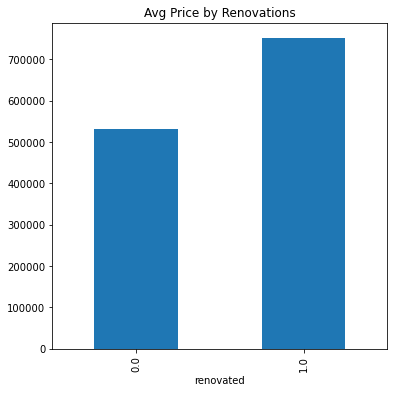

In [45]:
renovated_price = df.groupby('renovated')['price'].mean().plot(kind='bar', title = 'Avg Price by Renovations', figsize=(6,6))
plt.savefig('avg_price_by_renovations')

## Step 5: Model Evaluation



## 5.1)  Fit an initial model and check the errors to see if the model assumptions are being met. If need be, go back to steps 3 and 4 to improve your model. 

In [46]:
subset=[
    "bathrooms",
    "bedrooms",
    "sqft_living", 
    "floors", 
    "waterfront", 
    "sqft_living15",
    "built_years",
    "renovated",
    "yard"
]

counter = 0

for zip in df.zipcode.values:
    if zip not in subset:
        subset.append(zip)
        counter += 1

In [47]:
for grade in set(df.grade.values):
    subset.append("grade_"+ str(grade))

In [48]:
for view in set(df.view.values):
    subset.append("view_"+ str(view))

In [49]:
for month in set(df.month_sold.values):
    subset.append("month_"+ str(month))

In [50]:
for condition in set(df.condition.values):
    subset.append("condition_"+ str(condition))

In [51]:
df[subset]

,bathrooms,bedrooms,sqft_living,floors,waterfront,sqft_living15,built_years,renovated,yard,98058,...,month_8,month_9,month_10,month_11,month_12,condition_1,condition_2,condition_3,condition_4,condition_5
0,2.25,4,2070,2.0,0,2390,35,0.0,8.592271,1,...,0,0,1,0,0,0,0,0,1,0
1,3.00,5,2900,1.0,0,2370,44,0.0,2.320690,0,...,1,0,0,0,0,0,0,0,0,1
2,2.50,4,3770,2.0,0,3710,24,0.0,5.778780,0,...,1,0,0,0,0,0,0,1,0,0
3,3.50,3,4560,2.0,0,4050,31,0.0,6.407018,0,...,0,0,0,0,0,0,0,1,0,0
4,2.50,3,2550,2.0,0,2250,17,0.0,4.216471,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,2.50,5,3240,1.0,0,2730,63,0.0,3.074074,0,...,0,0,0,0,0,0,0,1,0,0
17286,1.75,2,1300,2.0,0,1350,73,0.0,6.153846,0,...,0,0,0,0,0,0,0,1,0,0
17287,1.00,3,1050,1.0,0,1760,68,0.0,9.405714,0,...,0,0,0,0,0,0,0,1,0,0
17288,1.50,3,1900,1.5,0,2080,50,0.0,34.094211,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
lm = LinearRegression()

lm.fit(df[subset], df['price'])

LinearRegression()

In [53]:
print(lm.intercept_)
print(lm.coef_)

564883.6440311762
[ 2.43294702e+04 -1.11247750e+04  1.45652378e+02 -1.19249244e+04
  5.84504524e+05  1.99661225e+01  3.42822803e+02  5.40295282e+04
  3.84235520e+02 -1.60505134e+05  1.28616102e+05  4.86797020e+04
  6.04160712e+03  4.51077858e+04 -1.80956195e+05  5.73241367e+04
  1.78447101e+05 -3.57696332e+04  3.04051912e+05  1.40374189e+05
 -4.95936906e+04 -1.51063662e+05 -4.03610412e+04 -1.04606694e+05
 -1.09546051e+05  5.73369643e+05  1.50536656e+04 -3.62342563e+04
 -3.52505814e+04 -2.19796306e+05 -1.47670912e+04 -7.77258021e+02
 -9.50697385e+04 -7.84399455e+04 -2.02285176e+05  2.43535426e+04
  6.23024850e+04 -1.87096858e+05  2.90835222e+05  2.35676013e+04
 -1.85378230e+05 -1.94777282e+05 -9.75133184e+04 -1.05724237e+05
  8.41668710e+04 -1.63343228e+05  3.01364507e+05 -1.36202042e+05
 -2.30612743e+04 -1.96519159e+05 -1.92213687e+05  2.76988011e+05
 -2.23816199e+05 -6.58922987e+04  4.21123552e+05 -1.59012867e+05
  8.94865354e+04  1.43637610e+05 -1.70145957e+05 -1.47558528e+05
  9.819

In [54]:
y_pred=lm.predict(df[subset])

In [55]:
y_pred[:100]

array([ 346966.845861  ,  825708.31882927, 1295490.34293317,
       1848622.24294714,  688948.12468759,  222655.45677112,
        744768.06522366,  688961.28371248,  375404.118407  ,
        639818.93027973,  642567.6841152 ,  478922.61411283,
        213616.707102  ,  401094.1237002 ,  256433.53219234,
       1157858.69009159,  916613.59276743, 1105223.28050173,
        330432.48783403,  462434.53385628,  365690.2852153 ,
       1288940.73634908,  733280.10484337,  665862.82596489,
        563535.69601321,  457376.80884603,  215624.59607738,
        152518.96421081,  368878.13484909,  748580.68857756,
        431161.79685862,  579692.68378575,  546242.17945025,
        296733.29285192,  417203.76666081, 1006722.10106033,
        930101.19364832,  405634.75200149,  347767.4613607 ,
       1614133.27267154,  476311.37506238,  265340.39222673,
        346498.58344354,  312860.76149543,  213652.89344315,
        252652.95548726,  431339.79455427,  547751.40367917,
        421662.29740147,

Text(0, 0.5, 'Predicted Values')

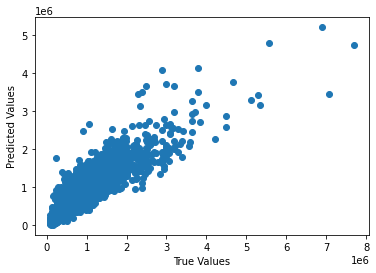

In [56]:
plt.scatter(df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [57]:
lm.score(df[subset], df['price'])

0.8318847785300262

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mae = mean_absolute_error(df['price'], y_pred)
mse = mean_squared_error(df['price'], y_pred)
rmse = np.sqrt(mse)
print(mae)
print(rmse)

88847.80126784196
152743.44773773404


## Plotting the residuals

C:\Users\dlee0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

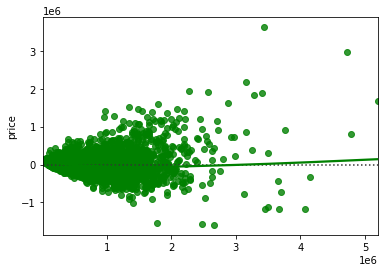

In [60]:
sns.residplot(y_pred, df['price'], lowess=True, color = "g")

In [61]:
residuals = df['price']-y_pred

C:\Users\dlee0\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dlee0\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


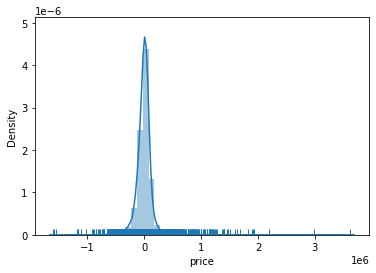

In [62]:
sns.distplot(residuals, kde=True, rug=True);

**A QQ plot of our residuals for the initial model shows us that we are not great at predicting the extreme values (in either direction). I decided to take the log of a few features with high coefficients to see that helps the model**

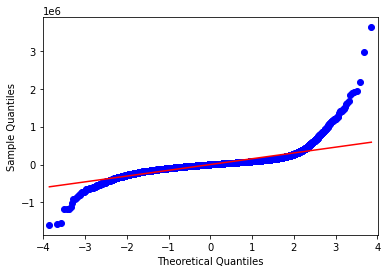

In [63]:
fig = sm.qqplot(residuals, line = 's')
plt.show()

In [64]:
df['log_price'] = np.log(df['price'])

In [65]:
np.exp(df['log_price'])

0         365000.0
1         865000.0
2        1038000.0
3        1490000.0
4         711000.0
           ...    
17285     750000.0
17286     440000.0
17287     310000.0
17288     427500.0
17289     348000.0
Name: log_price, Length: 17290, dtype: float64

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

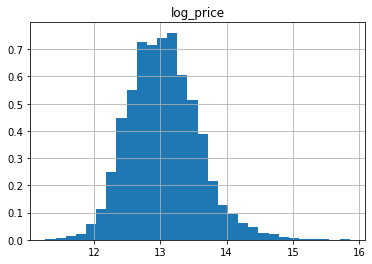

In [66]:
df.hist(column=['log_price'], bins=30, density=True)

In [67]:
lm_log = LinearRegression()
lm_log.fit(df[subset], df['log_price'])

LinearRegression()

In [68]:
y_log_pred = lm_log.predict(df[subset])

C:\Users\dlee0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_price'>

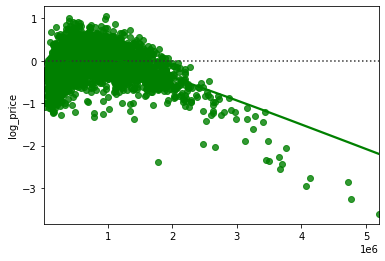

In [69]:
sns.residplot(y_pred, df['log_price'], lowess=True, color = "g")

In [70]:
df['sqftliving_log'] = np.log(df['sqft_living'])
df['sqftliving15_log'] = np.log(df['sqft_living15'])

In [71]:
subset[5] = 'sqftliving15_log'
subset[2] = 'sqftliving_log'

In [72]:
subset

['bathrooms',
 'bedrooms',
 'sqftliving_log',
 'floors',
 'waterfront',
 'sqftliving15_log',
 'built_years',
 'renovated',
 'yard',
 98058,
 98115,
 98006,
 98034,
 98052,
 98031,
 98007,
 98199,
 98027,
 98119,
 98122,
 98155,
 98055,
 98118,
 98014,
 98059,
 98004,
 98053,
 98072,
 98133,
 98092,
 98074,
 98125,
 98045,
 98106,
 98022,
 98177,
 98008,
 98002,
 98040,
 98029,
 98042,
 98001,
 98065,
 98056,
 98144,
 98188,
 98109,
 98010,
 98075,
 98198,
 98030,
 98105,
 98023,
 98028,
 98112,
 98038,
 98116,
 98103,
 98178,
 98168,
 98005,
 98077,
 98146,
 98011,
 98126,
 98108,
 98136,
 98033,
 98003,
 98117,
 98107,
 98019,
 98102,
 98032,
 98148,
 98166,
 98070,
 98024,
 98039,
 'grade_1',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9

In [73]:
lm_log = LinearRegression()
lm_log.fit(df[subset], df['log_price'])

LinearRegression()

In [74]:
y_log_pred = lm_log.predict(df[subset])

C:\Users\dlee0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_price'>

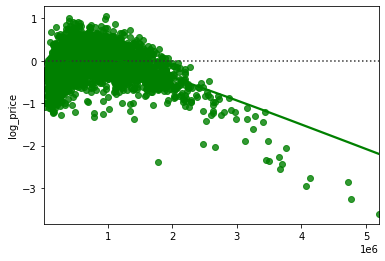

In [75]:
sns.residplot(y_pred, df['log_price'], lowess=True, color = "g")

In [76]:
log_residuals = df['log_price']-y_log_pred 

**Taking the log of our target price and sqft living and sqft living of the nearest 15 neighbors helped us with the prediction quite a bit**

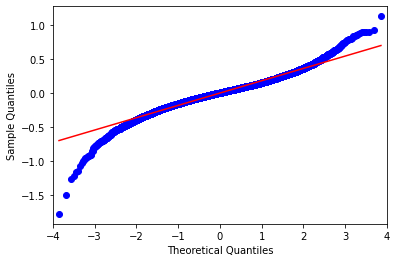

In [77]:
fig = sm.qqplot(log_residuals, line = 's')
plt.show()

### 5.2) Perform a train-test split of the data.

In [78]:
df_features = df[subset]

target = df['price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9, test_size = 0.2)

### 5.3) Fit the model to the training data.

In [80]:
lm = LinearRegression()

lm = lm.fit(X_train, y_train)


### 5.4) Use the model to predict on the training set and the test set.

**From above we know that there is a diminishing returns pattern so I used a log model was better**

In [81]:
y_test_pred = lm_log.predict(X_test)
y_train_pred = lm_log.predict(X_train)

### 5.5) Evaluate the training and test predictions using RMSE

In [82]:
#our model predcict the log of gross, so now we must exponentiate to get the value in $
y_train_pred = np.exp(y_train_pred)
y_test_pred = np.exp(y_test_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 124429.94564169114
Training:  132110 vs. Testing:  124429


### 5.6) Determine if your model is overfit.

No the model is not overfitting since the training and test are pretty similar

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models. You will have to repeat steps 5.3 through 5.6 to determine how your new model is performing. 

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [83]:
X_train.head()

,bathrooms,bedrooms,sqftliving_log,floors,waterfront,sqftliving15_log,built_years,renovated,yard,98058,...,month_8,month_9,month_10,month_11,month_12,condition_1,condition_2,condition_3,condition_4,condition_5
7189,2.25,4,7.565275,1.0,0,7.731931,53,0.0,4.320207,0,...,0,0,0,0,0,0,0,1,0,0
12378,1.00,2,6.966024,1.0,0,7.222566,40,0.0,7.264151,0,...,0,0,0,0,0,0,0,1,0,0
5664,2.00,3,7.237059,1.0,0,7.580700,31,0.0,3.688489,0,...,1,0,0,0,0,0,0,1,0,0
927,1.00,3,7.352441,1.5,0,7.154615,114,0.0,3.807692,0,...,0,0,0,0,0,0,0,0,1,0
14353,3.25,4,8.209036,2.0,0,8.077137,34,0.0,6.964072,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
selector = SelectKBest(f_regression, k=50)

selector.fit(X_train, y_train)

SelectKBest(k=50, score_func=<function f_regression at 0x000001F21FD01E50>)

In [85]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [86]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [87]:
list(removed_columns)

['built_years',
 'yard',
 98115,
 98034,
 98052,
 98007,
 98027,
 98122,
 98155,
 98118,
 98014,
 98059,
 98053,
 98072,
 98074,
 98125,
 98045,
 98177,
 98008,
 98029,
 98065,
 98056,
 98144,
 98188,
 98109,
 98010,
 98028,
 98116,
 98103,
 98077,
 98146,
 98011,
 98126,
 98108,
 98136,
 98117,
 98107,
 98019,
 98032,
 98148,
 98166,
 98070,
 98024,
 'grade_1',
 'grade_3',
 'grade_4',
 'grade_8',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4']

In [88]:
list(selected_columns)

['bathrooms',
 'bedrooms',
 'sqftliving_log',
 'floors',
 'waterfront',
 'sqftliving15_log',
 'renovated',
 98058,
 98006,
 98031,
 98199,
 98119,
 98055,
 98004,
 98133,
 98092,
 98106,
 98022,
 98002,
 98040,
 98042,
 98001,
 98075,
 98198,
 98030,
 98105,
 98023,
 98112,
 98038,
 98178,
 98168,
 98005,
 98033,
 98003,
 98102,
 98039,
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_5']

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [89]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)




Training Root Mean Squared Error: 175961.11672167343
Testing Root Mean Squared Error: 172598.96927729686


### RFECV

In [90]:
ols = LinearRegression()

In [91]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estima

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [92]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [93]:
list(removed_rfe)

['bathrooms',
 'bedrooms',
 'sqftliving_log',
 'floors',
 'waterfront',
 'sqftliving15_log',
 'built_years',
 'renovated',
 'yard',
 98058,
 98115,
 98006,
 98034,
 98052,
 98031,
 98007,
 98199,
 98027,
 98119,
 98122,
 98155,
 98055,
 98118,
 98014,
 98059,
 98004,
 98053,
 98072,
 98133,
 98092,
 98074,
 98125,
 98045,
 98106,
 98022,
 98177,
 98008,
 98002,
 98040,
 98029,
 98042,
 98001,
 98065,
 98056,
 98144,
 98188,
 98109,
 98010,
 98075,
 98198,
 98030,
 98105,
 98023,
 98028,
 98112,
 98038,
 98116,
 98103,
 98178,
 98168,
 98005,
 98077,
 98146,
 98011,
 98126,
 98108,
 98136,
 98033,
 98003,
 98117,
 98107,
 98019,
 98102,
 98032,
 98148,
 98166,
 98070,
 98024,
 98039,
 'grade_1',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_11']

In [94]:
len(list(selected_rfe))

10

In [95]:
selected_rfe

Index(['month_1', 'month_2', 'month_9', 'month_10', 'month_12', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

## Step 7: Compare the RMSE of your different models that use differen features and determine the best model overall.

In [96]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 373407.9967980876
Testing Root Mean Squared Error: 362019.3342168735


In [97]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  124429.94564169114 
 KBest:    172598.96927729686 
 RFE:      362019.3342168735


## Step 8:  Refit your best model to the entire dataset.

In [101]:
lm_final = LinearRegression()

lm_final = lm.fit(df[subset], df['price'])

lm_final

LinearRegression()

In [105]:
len(df[subset].columns)

113

In [103]:
len(lm.coef_)

113

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [108]:
import pickle

pickle_out = open("model.pickle", "wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [112]:
other_info = [subset, 
              selected_rfe, 
              df.groupby('bathrooms')['price'].mean(), 
              df.groupby('bedrooms')['price'].mean(), 
              df.groupby('renovated')['price'].mean(),
              avg_price_zip
             ]

In [113]:
other_info

[['bathrooms',
  'bedrooms',
  'sqftliving_log',
  'floors',
  'waterfront',
  'sqftliving15_log',
  'built_years',
  'renovated',
  'yard',
  98058,
  98115,
  98006,
  98034,
  98052,
  98031,
  98007,
  98199,
  98027,
  98119,
  98122,
  98155,
  98055,
  98118,
  98014,
  98059,
  98004,
  98053,
  98072,
  98133,
  98092,
  98074,
  98125,
  98045,
  98106,
  98022,
  98177,
  98008,
  98002,
  98040,
  98029,
  98042,
  98001,
  98065,
  98056,
  98144,
  98188,
  98109,
  98010,
  98075,
  98198,
  98030,
  98105,
  98023,
  98028,
  98112,
  98038,
  98116,
  98103,
  98178,
  98168,
  98005,
  98077,
  98146,
  98011,
  98126,
  98108,
  98136,
  98033,
  98003,
  98117,
  98107,
  98019,
  98102,
  98032,
  98148,
  98166,
  98070,
  98024,
  98039,
  'grade_1',
  'grade_3',
  'grade_4',
  'grade_5',
  'grade_6',
  'grade_7',
  'grade_8',
  'grade_9',
  'grade_10',
  'grade_11',
  'grade_12',
  'grade_13',
  'view_0',
  'view_1',
  'view_2',
  'view_3',
  'view_4',
  'month_

In [114]:
pickle_out = open('other_info.pickle', 'wb')
pickle.dump(other_info, pickle_out)
pickle_out.close()